# Business Problem

# How can healthcare providers use patient data to predict cardiovascular disease risk (target) and develop preventive strategies?

# An electrocardiogram (ECG or EKG) dataset

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score 
# because it's a classification problem

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers # L1 Lasso reg # L2 Ridge reg
from keras.callbacks import EarlyStopping

In [2]:
# read the csv file
data = pd.read_csv("C:/Users/91938/Downloads/DataSets/ECG-Dataset.csv")
data

,age,sex,smoke,years,ldl,chp,height,weight,fh,active,...,ihd,hr,dm,bpsys,bpdias,htn,ivsd,ecgpatt,qwave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0


In [3]:
data.columns = ['age','sex','smoker','years_of_smoking','LDL_cholesterol','chest_pain_type',
                'height','weight','familyhist','activity', 'lifestyle', 'cardiac intervention',
                'heart_rate', 'diabets', 'blood_pressure_sys', 'blood_pressure_dias','hypertention',
                'Interventricular_septal_end_diastole','ecg_pattern', 'Q_wave', 'target']

In [4]:
data.shape

(333, 21)

In [5]:
data.head()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


In [6]:
data.describe()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [7]:
data.tail()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0
332,68,1,0,0,92.0,2,165,80.0,1,0,...,0,68,0,115,75,1,0,4,0,0


# Exploratory Data Analysis

In [8]:
# Checking for Missing Values
# Total Percentage of Missing Data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


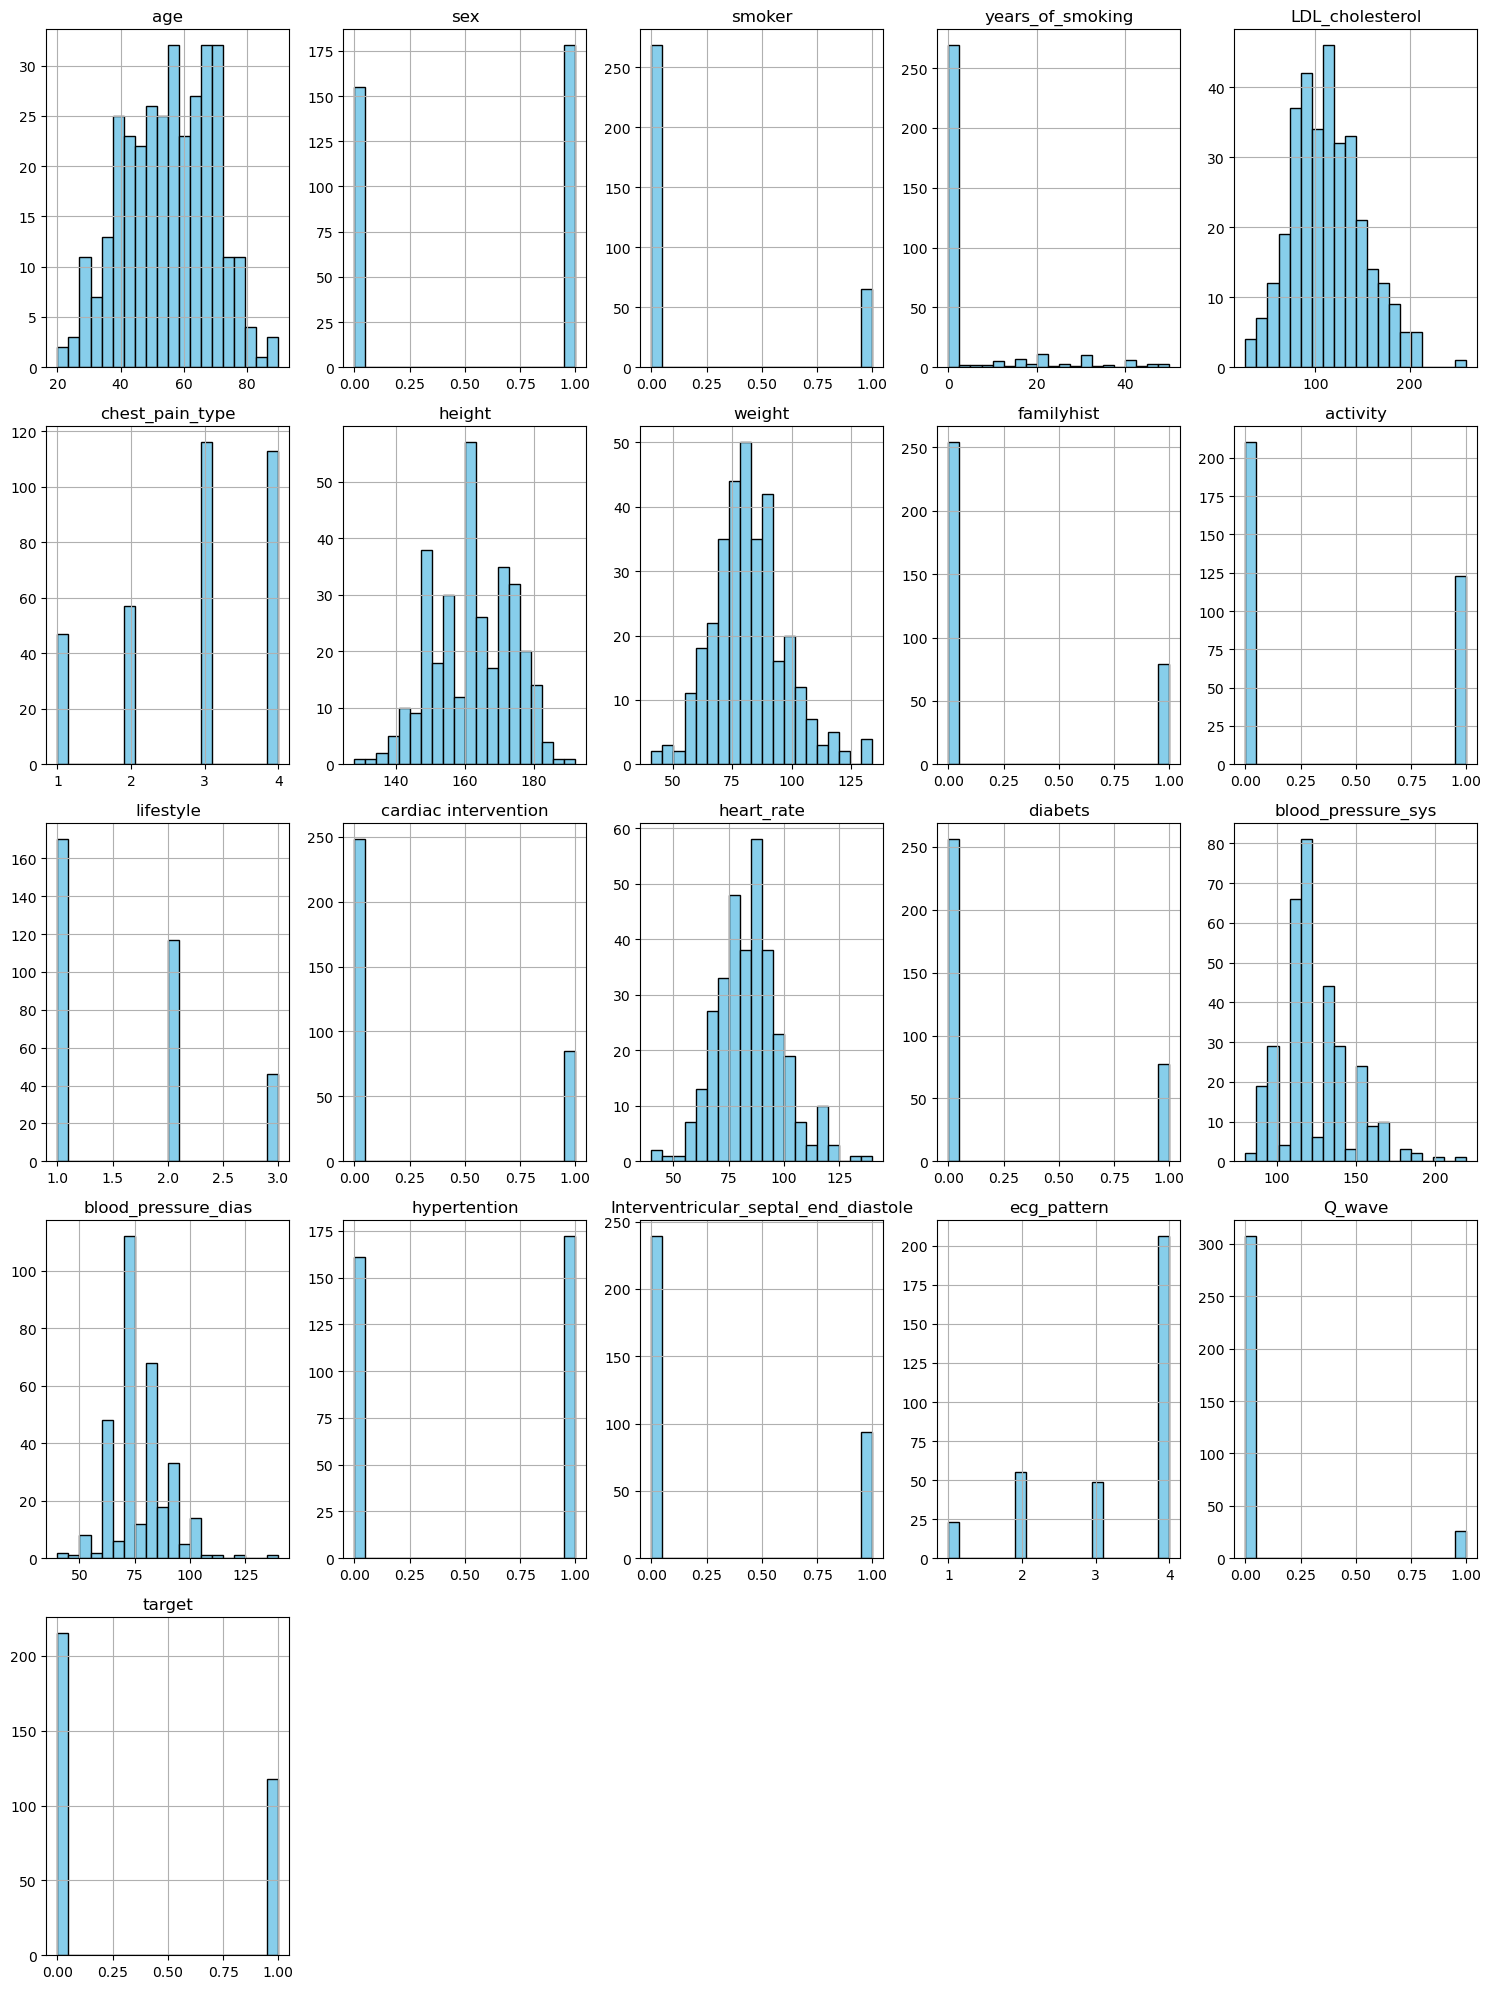

In [9]:
# Review All Features
# Data Distribution of All Participants
# Plot Histogram to See the Distribution of the Data
# Plot Histogram for All Numerical Features
data.hist(figsize=(15, 20), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

# The data on the Q wave column is poorly balanced

# Only Heart Disease Partipants

<Figure size 1500x2000 with 0 Axes>

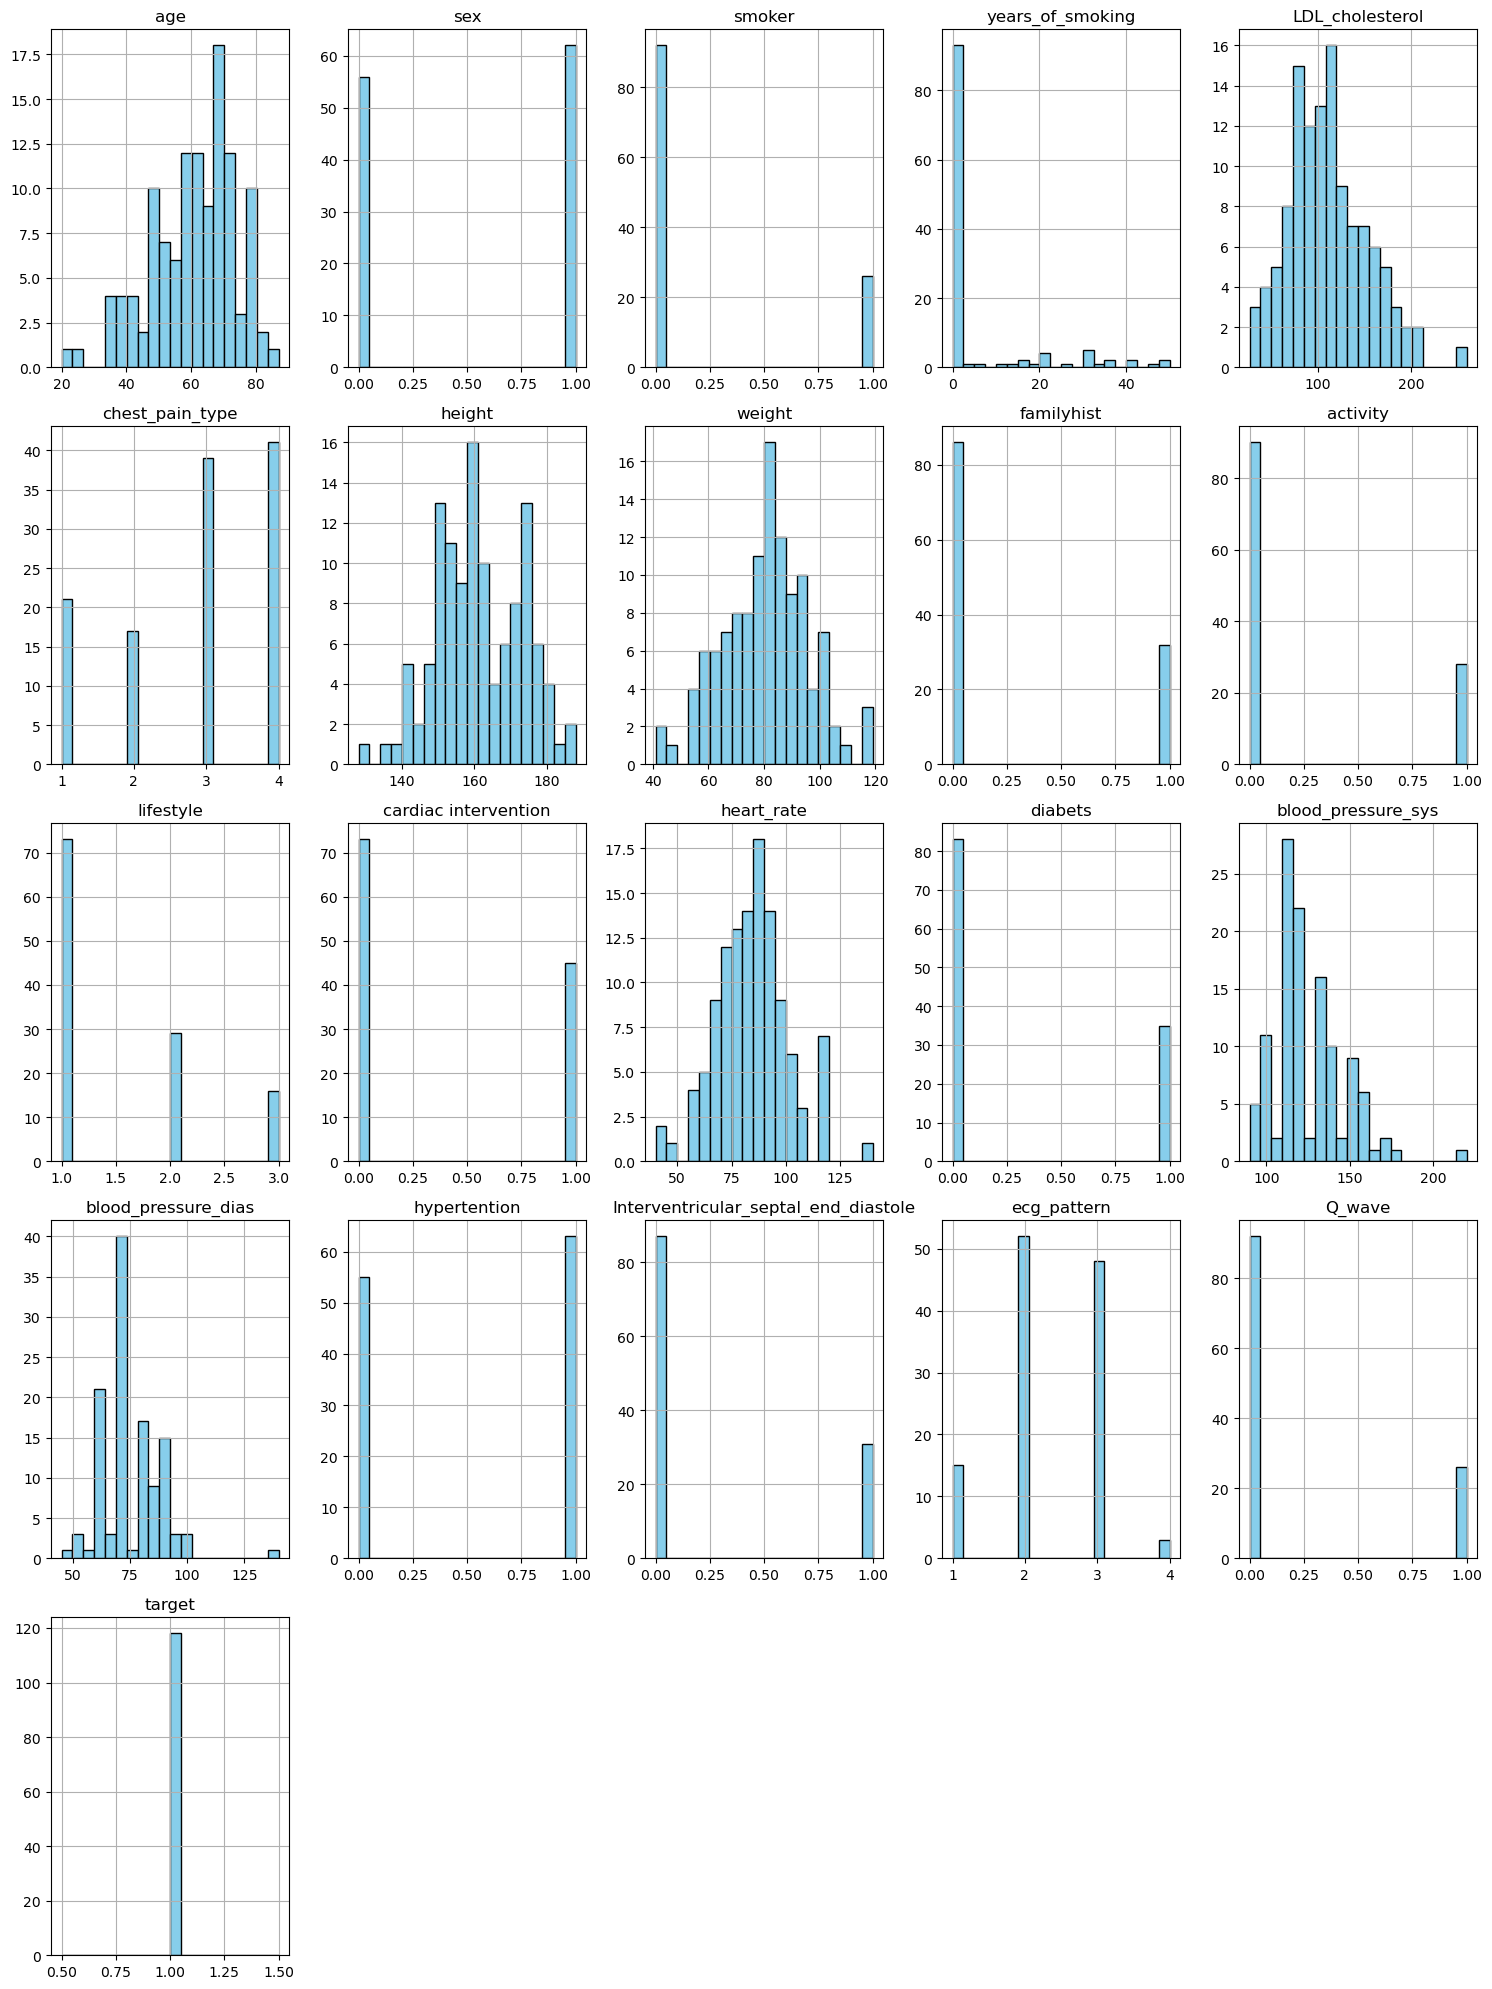

In [10]:
# Filter data for heart disease cases
dataset_copy = data[data['target'] == 1]

# Plot histograms for the first 21 columns (numerical)
fig = plt.figure(figsize=(15, 20))
dataset_copy.hist(figsize=(15, 20), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()  # Prevents overlap
plt.show()

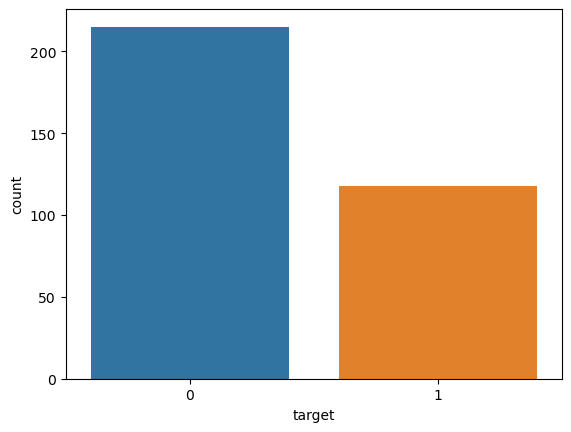

In [11]:
# Case Counts
# to check the imbalance in the data
# SMOTE

sns.countplot(x='target',data=data)
plt.show()

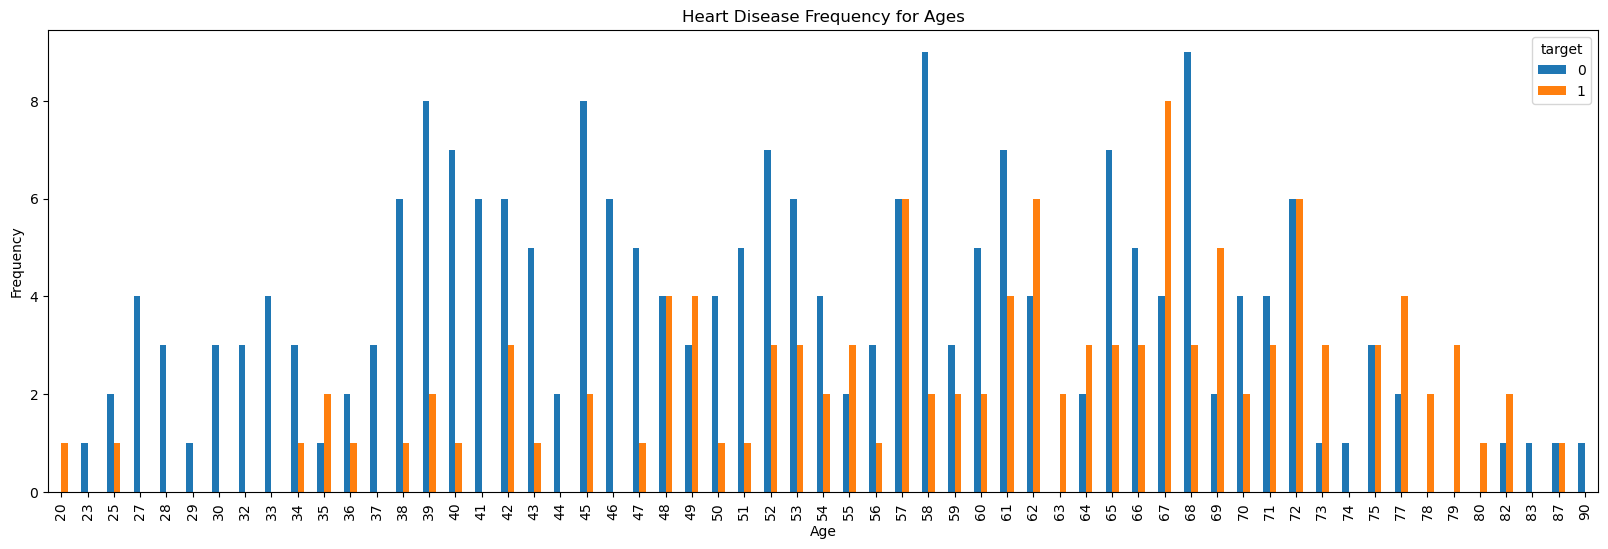

In [12]:
# Heart Disease Frequency for Ages

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

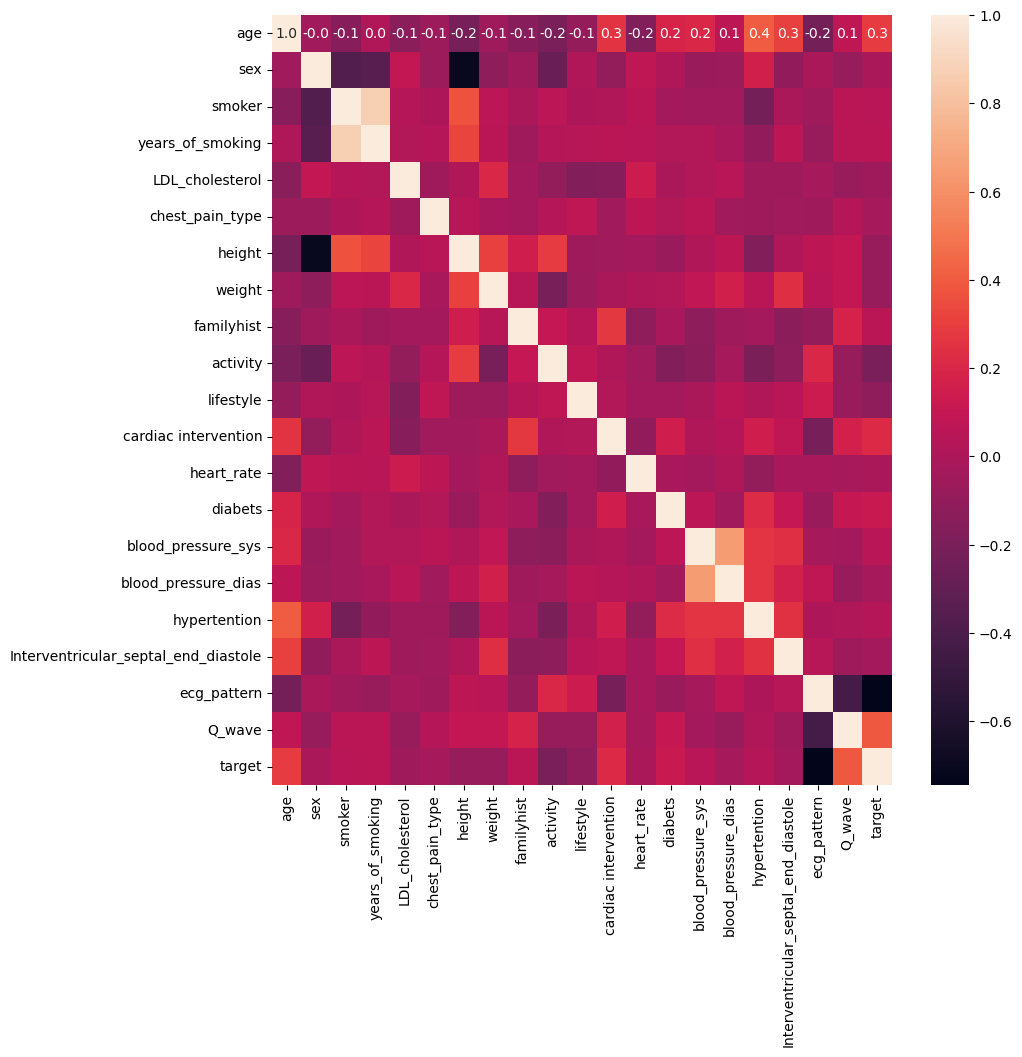

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# Data Splitting into Training and Test Set

In [14]:
X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

In [15]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [16]:
X.shape

(333, 20)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2) # Training data= 0.8

In [18]:
# Convert the data to categorical labels
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(Y_train[:10])

(266, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [19]:
# early stopping is a keras technique
# prevent from overfitting or underfitting
# loss- d/f b/w predicted and actual value
# verbose is for triggering an alert
# patience is the number of epochs before the alert is triggered
# epoch is one training cycle

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

# Building the Model Using Neural Networks

In [20]:
# add is for adding the layers
# dense is for the number of neurons in that particular layer
# 2 to the power of n formula should be followed to give the neurons in each layer
# 0.001 is denoted by alpha and it is the learning rate for the model.
# Regularizer is L2 which is used (Ridge) # L1 is Lasso
# activation functions is nothing but mathematical or a statistical function to build each layer inside the neural network.

model = Sequential()

model.add(Dense(64, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

# dropout is dropping the 20% of the neurons to prevent overfitting

model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(8, activation='softmax'))  # For multi-class classification
model.add(Dropout(0.20))

model.add(Dense(2, activation='sigmoid'))

# Compile model
adam = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

C:\Users\91938\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,106 (16.04 KB)

 Trainable params: 4,106 (16.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10, callbacks=[es])

# Evaluate the model on the test data
acc = model.evaluate(X_test, Y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6542 - loss: 0.6826 - val_accuracy: 0.5672 - val_loss: 0.7071
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.6677 - val_accuracy: 0.5672 - val_loss: 0.6886
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.6466 - val_accuracy: 0.5672 - val_loss: 0.6391
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.5836 - val_accuracy: 0.8209 - val_loss: 0.5526
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8897 - loss: 0.4731 - val_accuracy: 0.8358 - val_loss: 0.4857
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9360 - loss: 0.4025 - val_accuracy: 0.8657 - val_loss: 0.4463
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8797 - loss: 0.3724 - val_accuracy: 0.8657 - val_loss: 0.4263
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8928 - loss: 0.3448 - val_accuracy: 0.8806 - val_loss

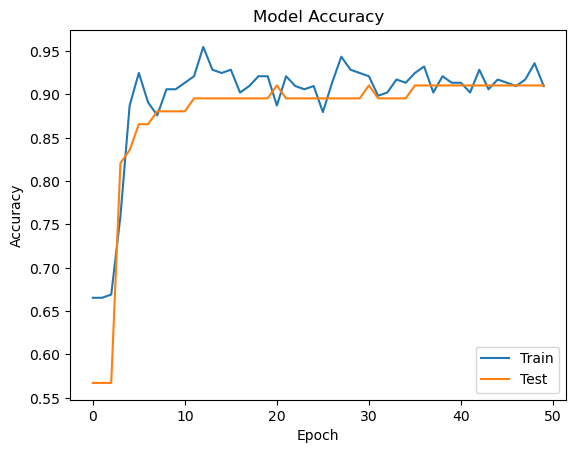

In [22]:
# Plot Model Accuracy
plt.plot(history.history['accuracy'])  # Training accuracy
plt.plot(history.history['val_accuracy'])  # Validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])  # Label the curves
plt.show()

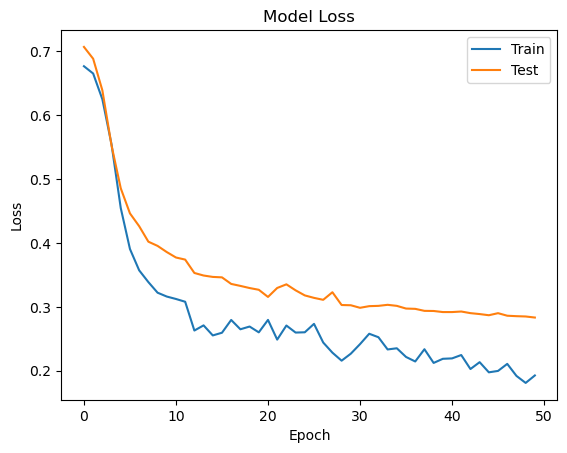

In [23]:
# Plot Model Loss
plt.plot(history.history['loss'])  # Training loss
plt.plot(history.history['val_loss'])  # Validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])  # Label the curves
plt.show()

In [24]:
# Make predictions from the model (probabilities) and convert them to class labels
categorical_pred = np.argmax(model.predict(X_test), axis=1)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1:  # Check if y_test is one-hot encoded (2D)
    y_test_labels = np.argmax(y_test, axis=1)  # Convert to class labels
else:
    y_test_labels = y_test  # If already categorical labels, no need for np.argmax

# Print accuracy score and classification report
print('Results for Categorical Model')
print(f"Accuracy: {accuracy_score(y_test_labels, categorical_pred)}")
print(classification_report(y_test_labels, categorical_pred))

# Precision: The proportion of positive predictions that were actually correct.
# Recall: The proportion of actual positives that were correctly identified by the model.
# F1-score: The harmonic mean of precision and recall, useful for imbalanced datasets.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Results for Categorical Model
Accuracy: 0.9104477611940298
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.83      1.00      0.91        29

    accuracy                           0.91        67
   macro avg       0.91      0.92      0.91        67
weighted avg       0.93      0.91      0.91        67



In [25]:
# Example unseen data point (new record)
unseen_data_point = {
    'age': 55,
    'sex': 1,
    'smoker': 1,
    'years_of_smoking': 20,
    'LDL_cholesterol': 120.0,
    'chest_pain_type': 2,
    'height': 170,
    'weight': 70.0,
    'familyhist': 1,
    'activity': 0,
    'lifestyle': 1,
    'cardiac intervention': 0,
    'heart_rate': 85,
    'diabets': 0,
    'blood_pressure_sys': 130,
    'blood_pressure_dias': 85,
    'hypertention': 0,
    'Interventricular_septal_end_diastole': 10,
    'ecg_pattern': 1,
    'Q_wave': 0,
}

# Convert to DataFrame
unseen_df = pd.DataFrame([unseen_data_point])

# Apply SAME preprocessing (standardize using training mean & std)
unseen_df = unseen_df - mean
unseen_df = unseen_df / std

# Convert unseen data to numpy array
unseen_input = np.array(unseen_df)

# Make predictions using the trained model
prediction_probabilities = model.predict(unseen_input)

# Convert prediction probabilities to class labels
predicted_class = np.argmax(prediction_probabilities, axis=1)

# Output the results
print(f"Prediction Probabilities: {prediction_probabilities}")
print(f"Predicted Class: {predicted_class[0]}")

# If the true label for this unseen point is known:
true_label = 1  # Replace this with the actual label
print(f"True Label: {true_label}")
accuracy = 1 if predicted_class[0] == true_label else 0
print(f"Accuracy for this point: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction Probabilities: [[0.30406055 0.71728766]]
Predicted Class: 1
True Label: 1
Accuracy for this point: 1
